#   Processing sequencing data from NCBI Gene Expression Omnibus (GEO)

![](./images/Module1/Data_Processing.png)

## Learning Objectives:
1. Understand the type of data that is accessible from GEO.
2. Demonstrate how to navigate the GEO website, search for dataset using accession number, and select samples.
3. Use the command-line interface to copy over data from GEO.

## Accessing public GEO sequencing data
The Gene Expression Omnibus (GEO) is a public repository that archives and freely distributes comprehensive sets of microarray,
next-generation sequencing, and other forms of high-throughput functional genomic data submitted by the scientific community.
In addition to data storage, the website prodide set of web-based tools and applications to help users query and download the
studies and gene expression patterns stored in GEO.

### Searching and accessing data on GEO
Searching for GEO is relatively straight forward via GEO website. First, users need to navigate to  <a href="https://www.ncbi.nlm.nih.gov/geo/">https://www.ncbi.nlm.nih.gov/geo/</a>.
There are multiple ways for searching datasets but the simples way is to provide the accession number in the search box.
We will use an example dataset with the accession number <a href="https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE48350">GSE48350</a> for demonstration.
The GEO website interface with searching procedure for the example date are shown in the figure below:

![](./images/Module1/GEO_Website.png)

When the searching process is done, a webpage with detailed description of the example dataset such as published date, title, organism, experiment type, dataset summary etc. will be shown in the figure below:

![](./images/Module1/GEO_Dataset_Page.png)

We can see that the dataset GSE48350 was published in Apr 21, 2014 which focuses on Human Alzheimer's
Disease using microarray sequencing technology. Samples were primary collected from 4 brain regions:
hippocampus (HC), entorhinal cortex (EC), superior frontal cortex (SCG), post-central gyrus (PCG)
of normal and disease patients.

### Downloading data using web-interface
At the bottom of the dataset page, users will find additional information about the dataset such as sequencing platform, number of samples, project ID and links to download the expression data. The exact places to find this information are shown in the figure below:

![](./images/Module1/Manual_Download.png)

As presented in the figure, the dataset GSE48350 were sequenced using Affymetrix Human Genome U133 Plus 2.0 Array and the whole dataset contains 253 samples. The summary table at the bottom of the page show the all the data generated rom the experiment.  User can click to "(http)" hyperlink to download all the samples or click "(custom)" to select and download the samples of interest. Note that, expression data download from this step are raw data and additional data processing need to be done locally for further analysis.

### Downloading data using R command line

If the users have programming background, it is more beneficial to automate the downloading task using R's command line. Getting data from GEO is really quite easy using <a href="https://bioconductor.org/packages/release/bioc/html/GEOquery.html">GEOquery</a> R package available in <a href="https://bioconductor.org/">Bioconductor</a>. Before starting, user need to install GEOquery package using the following command.

In [3]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("GEOquery")

library("GEOquery")

Bioconductor version '3.14' is out-of-date; the current release version '3.15'
  is available with R version '4.2'; see https://bioconductor.org/install

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.r-project.org


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Warning message:
"package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'GEOquery'"
Old packages: 'AnnotationHub', 'BiocFileCache', 'BiocManager', 'DBI', 'DT',
  'ExperimentHub', 'FNN', 'GPArotation', 'GenomeInfoDb', 'R.methodsS3', 'R.oo',
  'R.utils', 'R2HTML', 'RColorBrewer', 'RCurl', 'RSQLite', 'RSpectra',
  'RcppArmadillo', 'RcppEigen', 'Rtsne', 'Rttf2pt1', 'S4Vectors', 'SCFA',
  'Seurat', 'SeuratObject', 'XML', 'ade4', 'blob', 'broom', 'car', 'cli',
  'clipr', 'clusterSim', 'colorspace', 'crayon', 'dbplyr', 'desc', 'devEMF',
  'doParallel', 'dplyr', 'e1071', '

We can use the `getGEO` function from the `GEOquery` package to download GEO dataset. First, users have to specify the accession ID of the dataset. For demonstration, we will use the same dataset `GSE48350`.

In [7]:
## change my_id to be the dataset that you want.
my_id <- "GSE48350"
gse <- getGEO(my_id)

Found 1 file(s)

GSE48350_series_matrix.txt.gz

Using locally cached version: C:\Users\bangt\AppData\Local\Temp\Rtmp88dpSR/GSE48350_series_matrix.txt.gz



Some datasets on GEO may be derived from different microarray platforms. Therefore the object `gse` is a list of different datasets.
You can find out how many were used by checking the length of the `gse` object.

In [11]:
## check how many platforms used
length(gse)

[1] 1

In [ ]:
The result shows that

In [ ]:
gse <- gse[[1]]
gse

In [ ]:
Usually there will only be one platform and the dataset we want to analyse will be the first object in the list (gse[[1]]).

In [9]:
summary(exprs(gse))

   GSM300166          GSM300167          GSM300168         GSM300169       
 Min.   :  0.0100   Min.   :  0.0100   Min.   : 0.0100   Min.   : 0.01942  
 1st Qu.:  0.6366   1st Qu.:  0.6519   1st Qu.: 0.3342   1st Qu.: 0.32045  
 Median :  0.8622   Median :  0.8828   Median : 0.7756   Median : 0.75063  
 Mean   :  0.9193   Mean   :  0.9492   Mean   : 0.9274   Mean   : 0.87928  
 3rd Qu.:  1.0903   3rd Qu.:  1.0880   3rd Qu.: 1.1929   3rd Qu.: 1.15987  
 Max.   :335.6746   Max.   :531.7116   Max.   :99.4657   Max.   :26.46015  
   GSM300170          GSM300171          GSM300172          GSM300173       
 Min.   : 0.01098   Min.   :  0.0100   Min.   :  0.0100   Min.   : 0.04317  
 1st Qu.: 0.32324   1st Qu.:  0.3139   1st Qu.:  0.3461   1st Qu.: 0.68439  
 Median : 0.77234   Median :  0.7294   Median :  0.7358   Median : 0.92708  
 Mean   : 0.93768   Mean   :  1.0313   Mean   :  0.9851   Mean   : 0.95096  
 3rd Qu.: 1.21978   3rd Qu.:  1.1992   3rd Qu.:  1.1835   3rd Qu.: 1.12190  
 Max. 

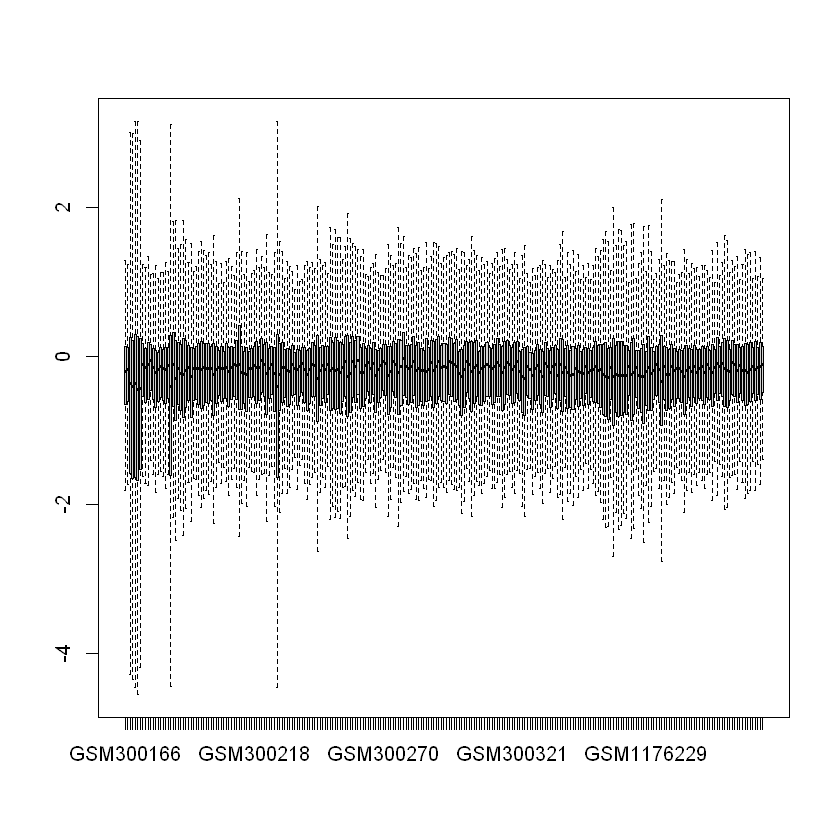

In [10]:
exprs(gse) <- log2(exprs(gse))
boxplot(exprs(gse),outline=FALSE)

In [ ]:
# log2 transformation
ex <- exprs(gset)
qx <- as.numeric(quantile(ex, c(0., 0.25, 0.5, 0.75, 0.99, 1.0), na.rm=T))
LogC <- (qx[5] > 100) ||
  (qx[6]-qx[1] > 50 && qx[2] > 0)
if (LogC) { ex[which(ex <= 0)] <- NaN
exprs(gset) <- log2(ex) }

# assign samples to groups and set up design matrix
gs <- factor(sml)
groups <- make.names(c("c","d"))
levels(gs) <- groups
gset$group <- gs
design <- model.matrix(~group + 0, gset)
colnames(design) <- levels(gs)

fit <- lmFit(gset, design)  # fit linear model

# set up contrasts of interest and recalculate model coefficients
cts <- paste(groups[1], groups[2], sep="-")
cont.matrix <- makeContrasts(contrasts=cts, levels=design)
fit2 <- contrasts.fit(fit, cont.matrix)

# compute statistics and table of top significant genes
fit2 <- eBayes(fit2, 0.01)
tT <- topTable(fit2, adjust="fdr", sort.by="B", number=250)

tT <- subset(tT, select=c("ID","adj.P.Val","P.Value","t","B","logFC","Gene.symbol","Gene.title"))
write.table(tT, file=stdout(), row.names=F, sep="\t")

In [ ]:
summary(exprs(gse))

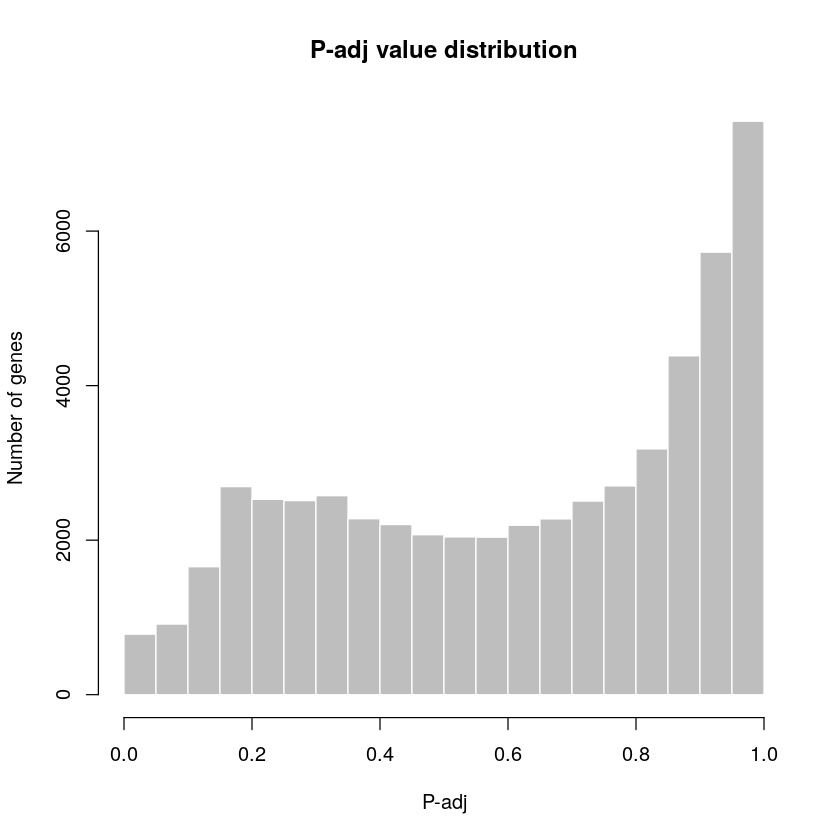

In [7]:
# Visualize and quality control test results.
# Build histogram of P-values for all genes. Normal test
# assumption is that most genes are not differentially expressed.
tT2 <- topTable(fit2, adjust="fdr", sort.by="B", number=Inf)
hist(tT2$adj.P.Val, col = "grey", border = "white", xlab = "P-adj",
     ylab = "Number of genes", main = "P-adj value distribution")

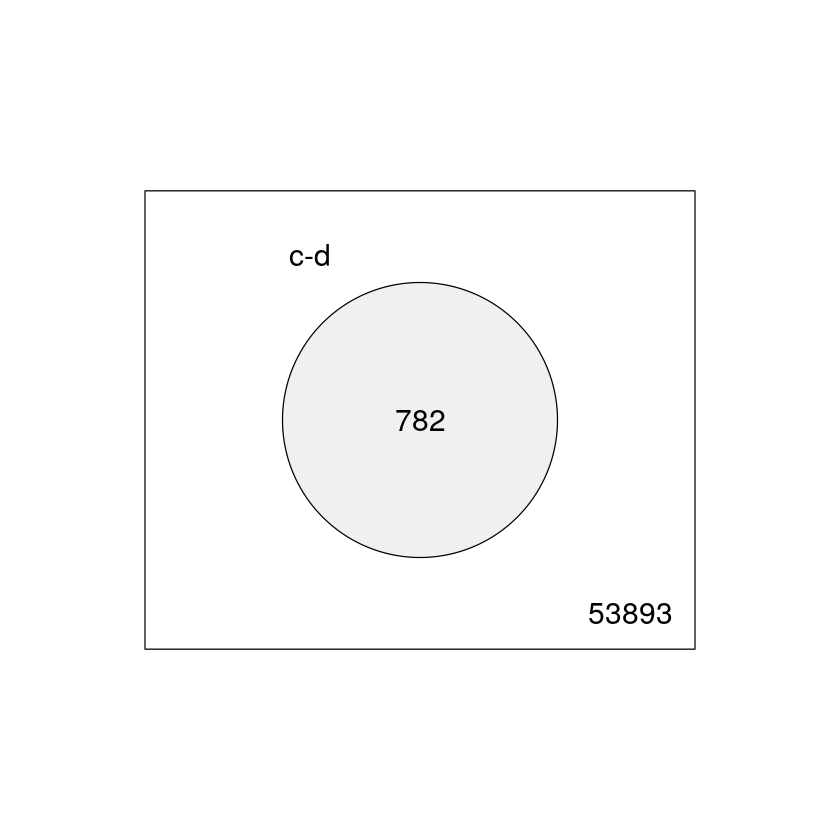

In [10]:
# summarize test results as "up", "down" or "not expressed"
dT <- decideTests(fit2, adjust.method="fdr", p.value=0.05)
# Venn diagram of results
vennDiagram(dT, circle.col=palette())

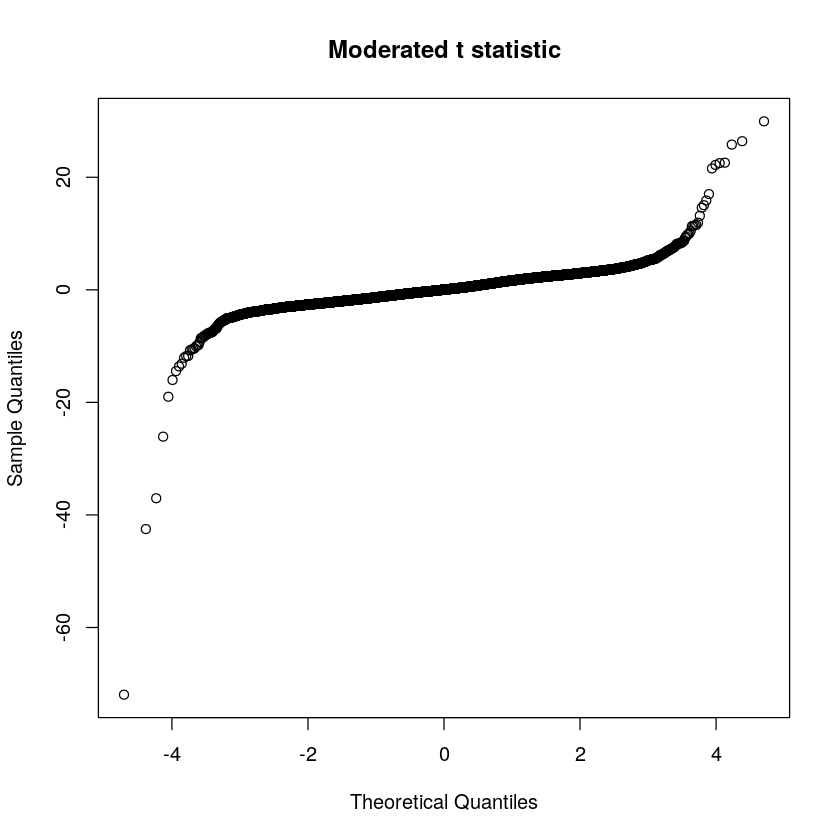

In [11]:
# create Q-Q plot for t-statistic
t.good <- which(!is.na(fit2$F)) # filter out bad probes
qqt(fit2$t[t.good], fit2$df.total[t.good], main="Moderated t statistic")

[1] "c-d"

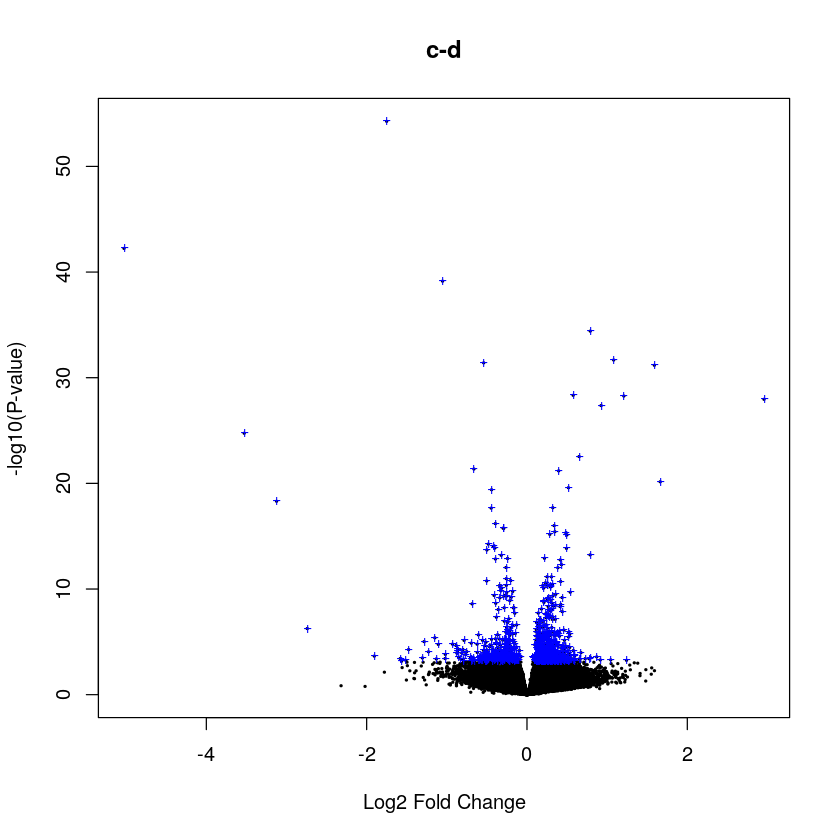

In [12]:
# volcano plot (log P-value vs log fold change)
colnames(fit2) # list contrast names
ct <- 1        # choose contrast of interest
volcanoplot(fit2, coef=ct, main=colnames(fit2)[ct], pch=20,
            highlight=length(which(dT[,ct]!=0)), names=rep('+', nrow(fit2)))

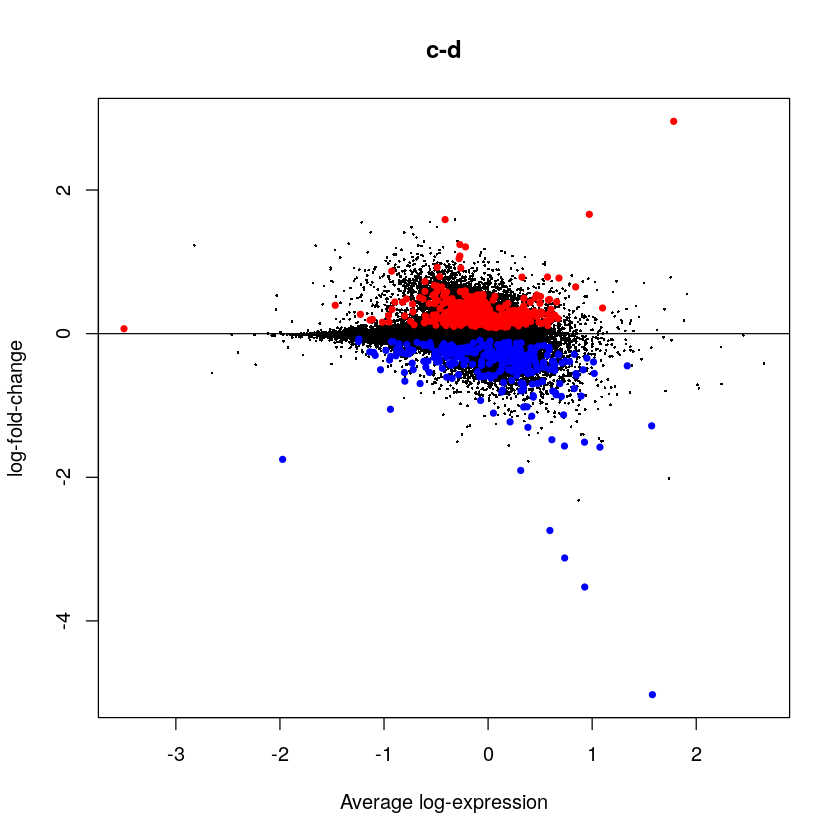

In [13]:
# MD plot (log fold change vs mean log expression)
# highlight statistically significant (p-adj < 0.05) probes
plotMD(fit2, column=ct, status=dT[,ct], legend=F, pch=20, cex=1)
abline(h=0)

In [14]:
# General expression data analysis
ex <- exprs(gset)

In [15]:
head(ex)


GSM300173  GSM300177   GSM300181    GSM300186    GSM300189  
1007_s_at -0.9304071 -0.31429476  0.302564486  1.706508981  0.44324721
1053_at   -0.1899698 -0.13598038 -0.303115126  0.003071112 -0.59434151
117_at    -0.2784191 -0.34321870 -0.008780405 -0.040806964  3.44181211
121_at     0.2035331  0.08515227  0.027424018  0.180686002  0.07046586
1255_g_at  0.5083751 -0.28938746  0.081224535  0.063953076 -0.31641582
1294_at   -0.3542675  0.01620918  0.065301945  0.933474441 -0.26148660
          GSM300192   GSM300196   GSM300204   GSM300208   GSM300214   ⋯
1007_s_at -0.35662310 -0.42414478 -0.68015019  0.70561100  0.23055657 ⋯
1053_at   -0.30161908  0.04182821 -0.07260928 -0.29828630 -0.29855911 ⋯
117_at     0.02899129  0.32742570  0.04146729 -0.39414786 -0.30109524 ⋯
121_at    -0.11509540  0.22434064  0.18612576  0.01974077  0.10861143 ⋯
1255_g_at  0.60411337  0.25961200  0.03355860 -0.19762676 -0.28731400 ⋯
1294_at    0.01263875 -0.62108366 -0.09775381 -0.40135476  0.04252303 ⋯
          GSM1176201  GSM1176202 GSM1176203  GSM1176204  GSM1176205 
1007_s_at  0.29735707  1.0451786  0.35818266  0.86631591 -0.86054531
1053_at   -0.24029072 -0.1255642  0.07094486 -0.15935824  0.07998875
117_at    -0.10819355  0.6173384 -0.09974673  0.59459326  0.13922468
121_at     0.01109913 -0.2074838 -0.10970414  0.41964341  0.10523085
1255_g_at  0.57820991 -0.2487116 -0.18000081  0.04598304  0.07277371
1294_at    0.45727226  1.3568780 -0.26581161  0.71747749 -0.18435227
          GSM1176206  GSM1176207  GSM1176208   GSM1176209 GSM1176210 
1007_s_at  0.73855074  0.43443811  0.548127436 -0.2959882  0.54792328
1053_at   -0.38857263 -0.09313018 -0.029009885  0.3229603 -0.01513872
117_at    -0.04004724 -0.03073124  0.805958790  0.3936756 -0.20228573
121_at    -0.13914736  0.02295550  0.009695871  0.2261897  0.14256048
1255_g_at -0.17741782  0.16908992 -0.080829885  3.2641306  0.15702094
1294_at   -0.08382117  0.23467213  0.351081562  0.1501239  0.51403397